# QA_Prod (v2.0)
    v2.0 -- First S/N prod plot

In [1]:
%matplotlib inline

In [2]:
# imports
import os
from imp import reload
from desispec.qa import qa_prod as dqap
from matplotlib import pyplot as plt

## Init

In [3]:
os.environ['DESI_SPECTRO_REDUX'] = '/home/xavier/DESI/DESI_SCRATCH/18.11/spectro/redux'
os.environ['SPECPROD'] = 'mini'

In [4]:
reload(dqap)
qa_prod = dqap.QA_Prod()

## Remake

#### In Python

In [ ]:
qa_prod.remake_frame_qa(remake_plots=True)

#### Script

    desi_qa_prod --remake_frameqa 3  

## Slurp

#### In Python

In [ ]:
qa_prod.slurp(remove=False)

#### Script
    desi_qa_prod --slurp

## Parsing QA Data

In [16]:
reload(dqap)
qa_prod = dqap.QA_Prod()

### Load QA

In [17]:
qa_prod.load_data()

INFO:qa.py:220:load_qa_multiexp: Loading QA prod file: /home/xavier/DESI/DESI_SCRATCH/18.11/spectro/redux/mini/QA/mini_qa.json


### One entry

In [18]:
qa_prod.data['20200316']['10']['b0']['FLUXCALIB']

{'METRICS': {'MAX_ZP_OFF': [0.0, 63],
  'NSTARS_FIBER': 10,
  'RMS_ZP': 0.0,
  'ZP': 18.1748373412697},
 'PARAMS': {'MAX_ZP_OFF': 0.2, 'ZP_WAVE': 4800.0}}

### Grab a Table of QA values

In [19]:
qa_tbl = qa_prod.get_qa_table('SKYSUB', 'RESID', channels=['b'])
qa_tbl

RESID,EXPID,CAMERA,DATE-OBS,NIGHT,EXPTIME,AIRMASS,FLAVOR
float64,str2,str2,str23,str8,float64,float64,str7
-0.029786085817594454,6,b7,2020-03-17T02:33:36.691,20200316,327.4658062613244,1.359901419566095,science
-0.08618690466616385,6,b8,2020-03-17T02:33:36.691,20200316,327.4658062613244,1.359901419566095,science
-0.06584513278209947,6,b9,2020-03-17T02:33:36.691,20200316,327.4658062613244,1.359901419566095,science
-0.06376511296070841,6,b3,2020-03-17T02:33:36.691,20200316,327.4658062613244,1.359901419566095,science
-0.09085049697194236,6,b0,2020-03-17T02:33:36.691,20200316,327.4658062613244,1.359901419566095,science
-0.08906429236735036,6,b5,2020-03-17T02:33:36.691,20200316,327.4658062613244,1.359901419566095,science
-0.06221329572748502,6,b1,2020-03-17T02:33:36.691,20200316,327.4658062613244,1.359901419566095,science
-0.07003866572522632,6,b6,2020-03-17T02:33:36.691,20200316,327.4658062613244,1.359901419566095,science
-0.08163781090453526,6,b4,2020-03-17T02:33:36.691,20200316,327.4658062613244,1.359901419566095,science


### Histogram

Text(0.5,0,'MED_SKY_RESID')

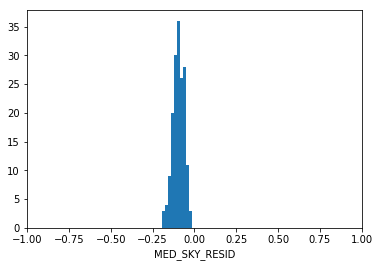

In [23]:
plt.clf()
ax = plt.gca()
ax.hist(qa_tbl['RESID'])
ax.set_xlim(-1,1)
ax.set_xlabel('MED_SKY_RESID')

## Camera Histograms

In [25]:
from desispec.qa import qa_plots as dqqp

### In Python

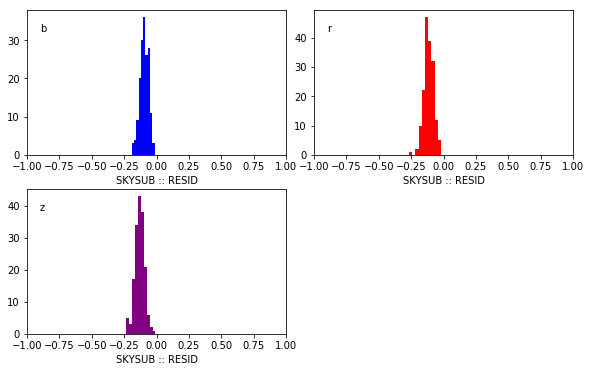

In [27]:
reload(dqqp)
dqqp.prod_channel_hist(qa_prod, 'SKYSUB', 'RESID', xlim=(-1,1))

### Script
     desi_qa_prod --channel_hist=default

## Time Series plot

In [28]:
qatype = 'SKYSUB'
metric = 'RESID'

### In Python

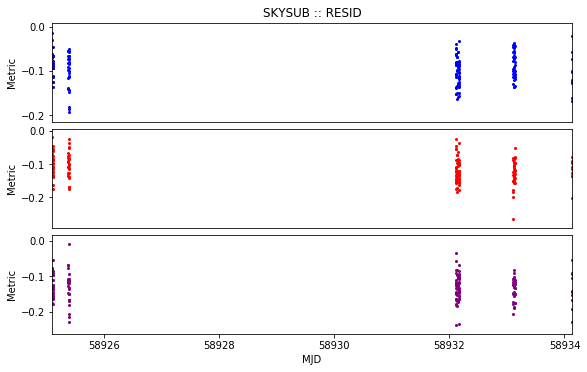

In [29]:
reload(dqqp)
dqqp.prod_time_series(qa_prod, qatype, metric)

### Script
    desi_qa_prod --time_series=SKYSUB-RESID